In [62]:
#libraries
import pandas as pd
import numpy as np
from scipy.stats import norm

In [63]:
df=pd.read_csv("D:/My Projects/Industrial-copper-Modeling/Copper_Set.xlsx - Result 1.csv")
df

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\3788185211.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/My Projects/Industrial-copper-Modeling/Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [65]:
df.shape

(181673, 14)

In [66]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

Error/ wrong format values Handling 

In [67]:
df.item_date=pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df.customer = pd.to_numeric(df['customer'], errors='coerce')
df.country = pd.to_numeric(df['country'], errors='coerce')
df.application = pd.to_numeric(df['application'], errors='coerce')
df.thickness = pd.to_numeric(df['thickness'], errors='coerce')
df.width = pd.to_numeric(df['width'], errors='coerce')
df.material_ref = df['material_ref'].str.lstrip('0')
df.product_ref= pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.selling_price= pd.to_numeric(df['selling_price'], errors='coerce')


In [68]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


**NUll values after format changing**

In [69]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [70]:
# material_ref null values 77919 so handle with unknown
df['material_ref'].fillna("unknown",inplace=True)
#dropping the null values if nulll values below 1% drop method is advisible
df.dropna(how='any',inplace=True)


C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2374328790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['material_ref'].fillna("unknown",inplace=True)


In [71]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [72]:
df.drop("id",inplace=True,axis=1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181631 non-null  object 
 1   quantity tons  181631 non-null  float64
 2   customer       181631 non-null  float64
 3   country        181631 non-null  float64
 4   status         181631 non-null  object 
 5   item type      181631 non-null  object 
 6   application    181631 non-null  float64
 7   thickness      181631 non-null  float64
 8   width          181631 non-null  float64
 9   material_ref   181631 non-null  object 
 10  product_ref    181631 non-null  int64  
 11  delivery date  181631 non-null  object 
 12  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 19.4+ MB


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
columns = [ 'quantity tons',  'application', 'thickness', 'width', 'selling_price','country']

**Before Skewness**

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


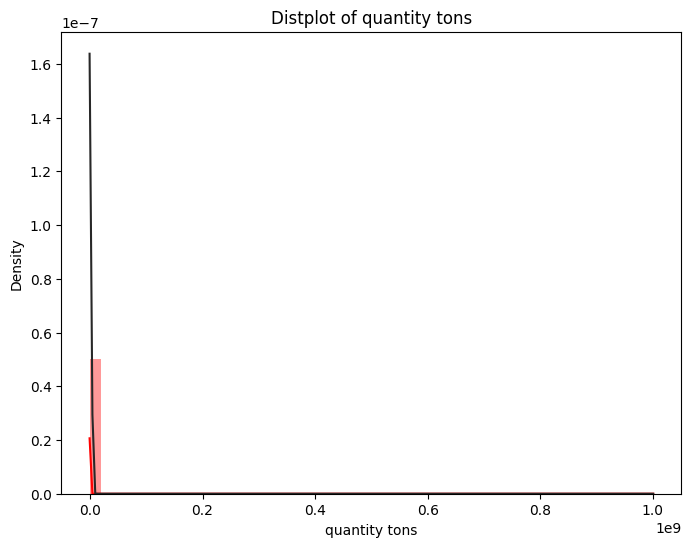

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


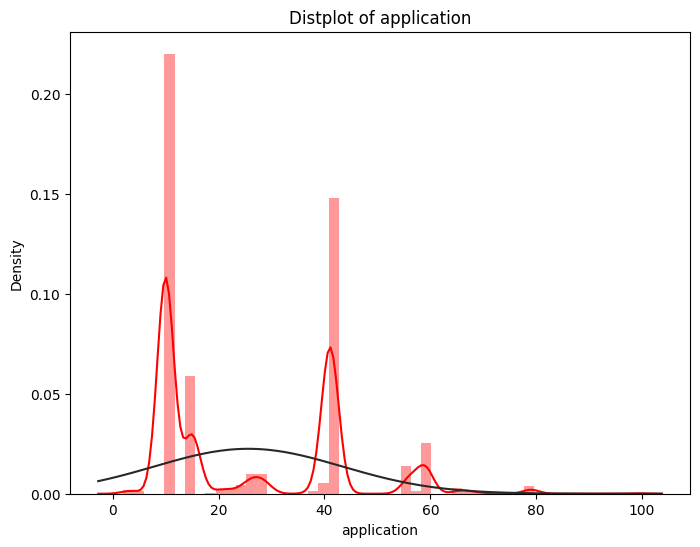

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


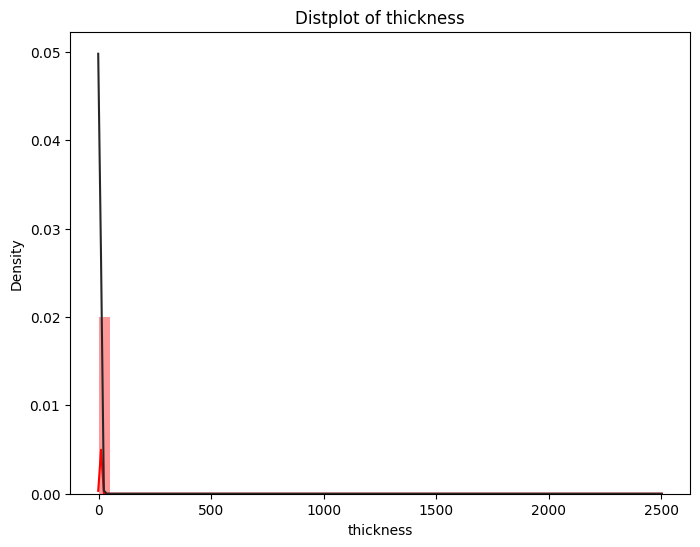

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


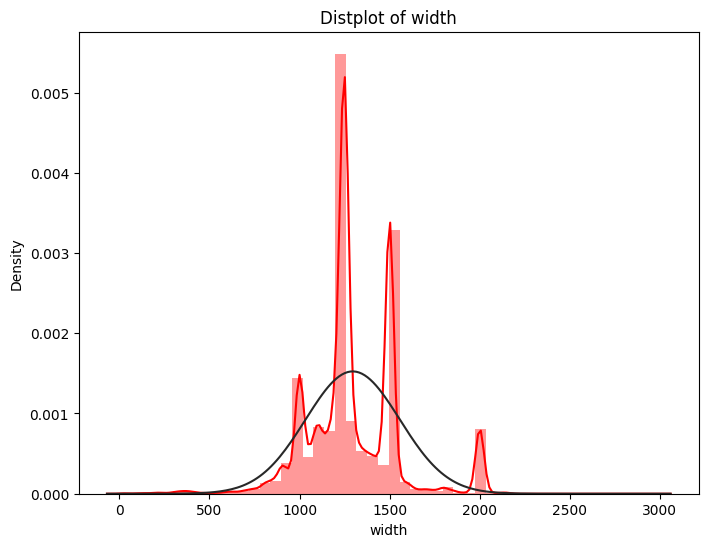

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


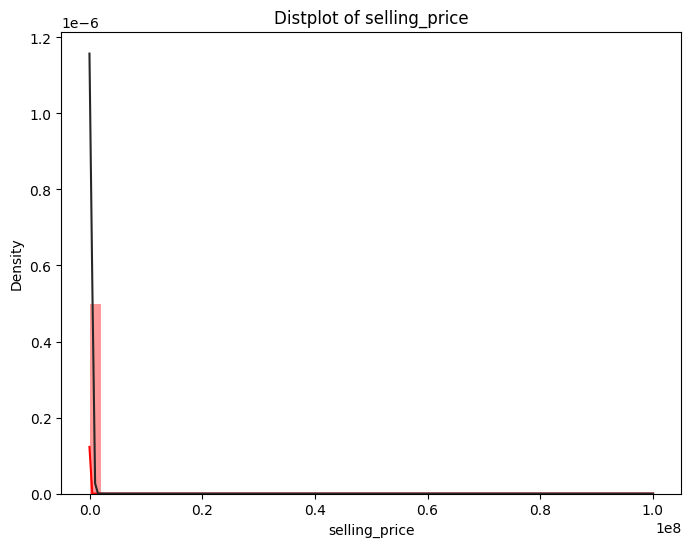

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1442300476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm,color="red")


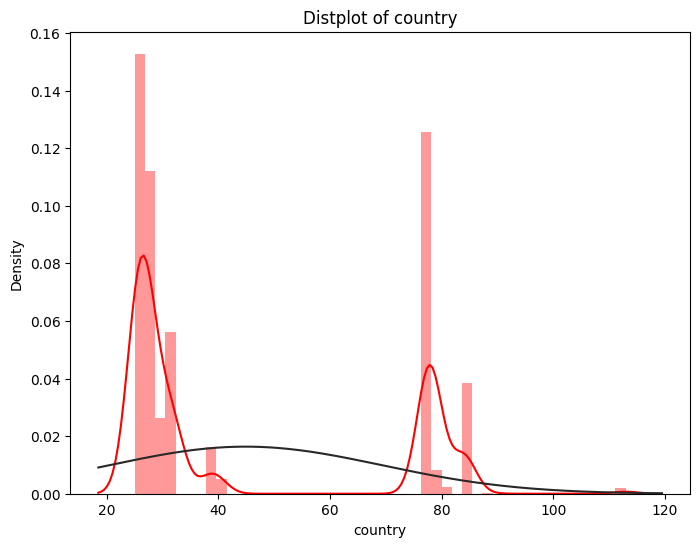

In [76]:

for i in columns:    
    plt.figure(figsize=(8,6))  
    sns.distplot(df[i],fit=norm,color="red")
    plt.title(f'Distplot of {i}')
    plt.show()


**skewnesss process**

In [77]:
df1=df.copy()
df1
    

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [78]:
low1= df1['quantity tons'] <= 0
print(low1.sum())

low2 = df1['selling_price'] <= 0
print(low2.sum())

low3 = df1['application'] <= 0
print(low3.sum())

low4 = df1['thickness'] <= 0
print(low4.sum())

low5 = df1['width'] <= 0
print(low5.sum())

low6 = df1['country'] <= 0
print(low6.sum())

4
7
0
0
0
0


In [79]:
low1

0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671     True
181672    False
Name: quantity tons, Length: 181631, dtype: bool

In [80]:
df1.loc[low1, 'quantity tons']


105730      -4.000000
131473      -1.476794
181661     -18.000000
181671   -2000.000000
Name: quantity tons, dtype: float64

In [81]:
df1.loc[low1, 'quantity tons'] = np.nan
df1.loc[low2, 'selling_price'] = np.nan

In [82]:
df1.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [83]:
df1.dropna(inplace=True)
df1.isnull().sum()


item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

**SKEWNESS BY LOG METHOD**

In [84]:
for i in columns:
    df1[i]=np.log(df1[i])

In [85]:
columns = [ 'quantity tons',  'application', 'thickness', 'width', 'selling_price','country']

In [86]:
df.width.skew()

0.37484465555785246

In [87]:
df1.width.skew()

-3.2881930862132633

In [88]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,3.332205,Won,W,2.302585,0.693147,7.313220,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,3.218876,Won,W,3.713572,-0.223144,7.098376,104991,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,3.401197,Won,WI,3.332205,-0.967584,6.858565,S0380700,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,3.465736,Won,S,4.077537,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,3.332205,Won,W,2.302585,1.386294,7.600902,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,4.670802,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.122867,1000222,164141591,2020-07-01,6.400257
181668,2020-07-02,4.629691,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.106606,1000777,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,3.218876,Won,W,3.713572,-0.051293,7.313220,1000227,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,3.218876,Won,W,3.713572,-0.342490,7.130899,1004216,164141591,2020-07-01,6.428105


**EXPLORATORY DATA ANALYSIS**

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


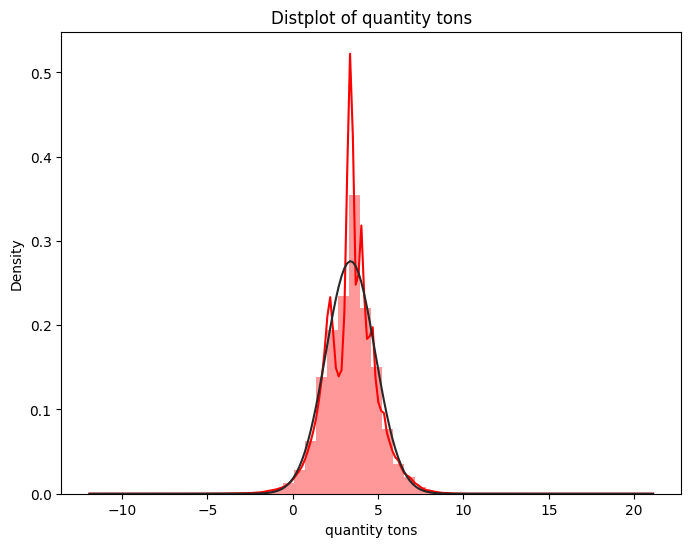

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


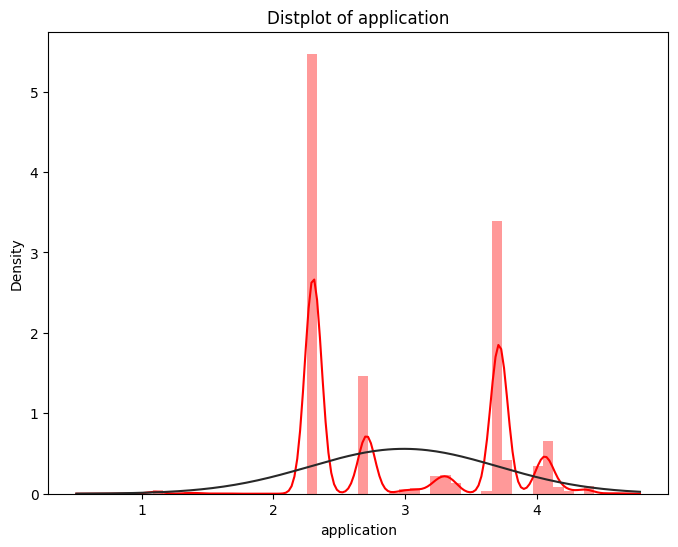

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


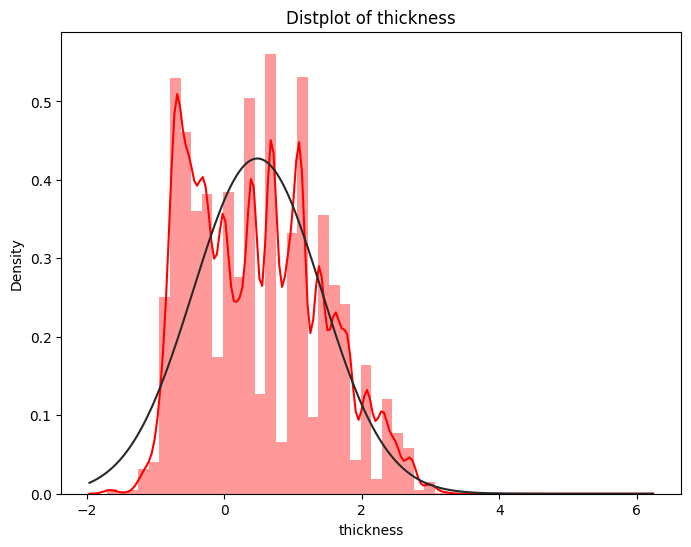

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


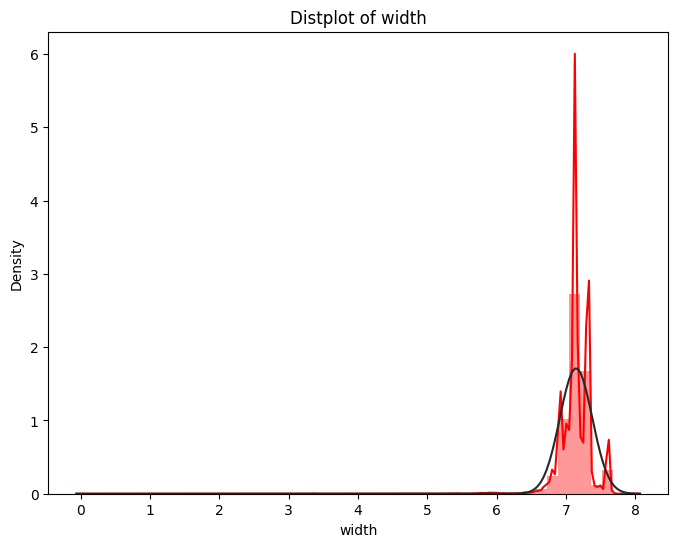

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


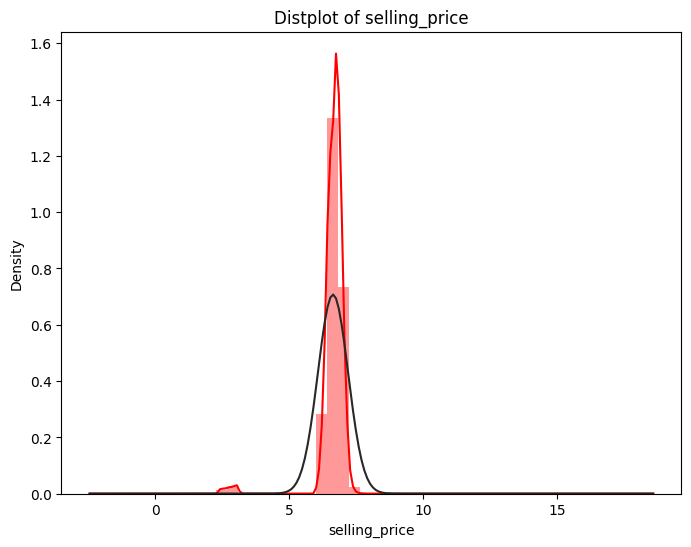

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\1865432718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[i],fit=norm,color="red")


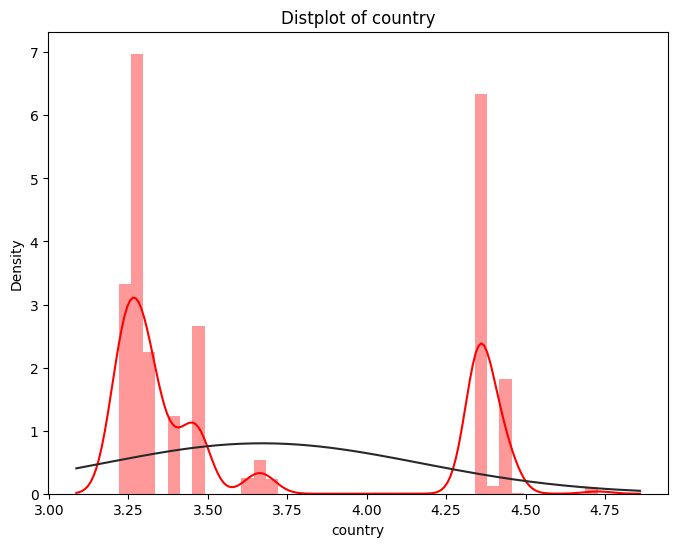

In [89]:
for i in columns:    
    plt.figure(figsize=(8,6))  
    sns.distplot(df1[i],fit=norm,color="red")
    plt.title(f'Distplot of {i}')
    plt.show()

Skewness BY BOXcox method 

In [90]:
columns1 = [ 'quantity tons',  'application', 'thickness', 'width', 'selling_price','country']

In [91]:
df2=df.copy()

In [92]:
from scipy import stats

In [93]:
for i in columns1:
    df2[i]=stats.boxcox(df2[i],lmbda=1)

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


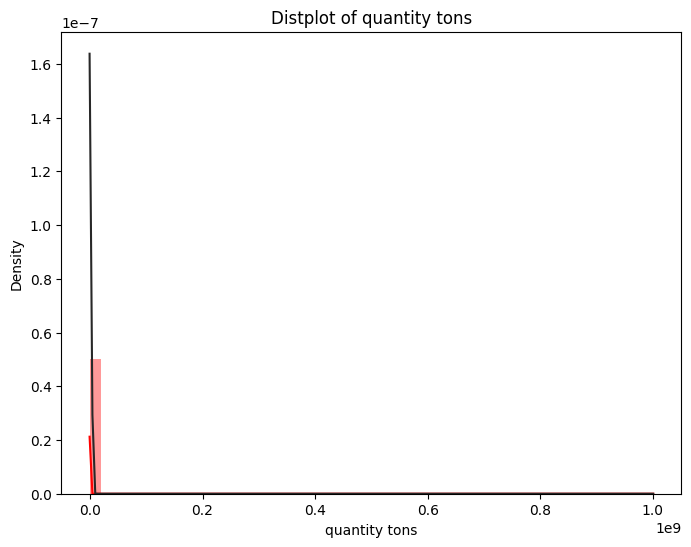

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


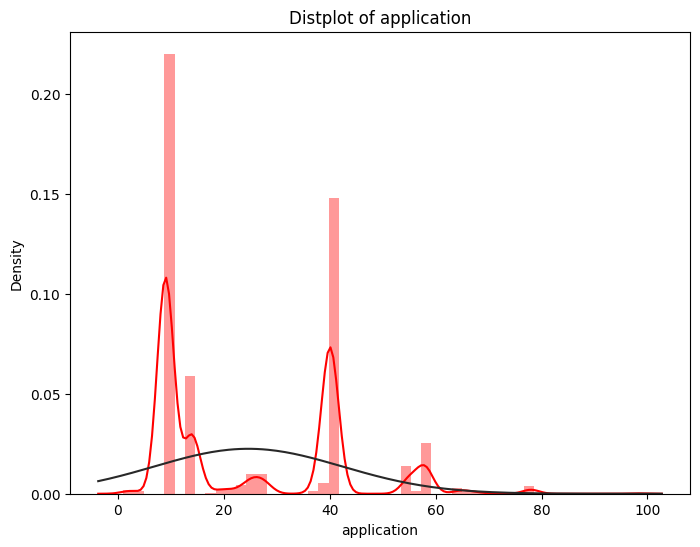

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


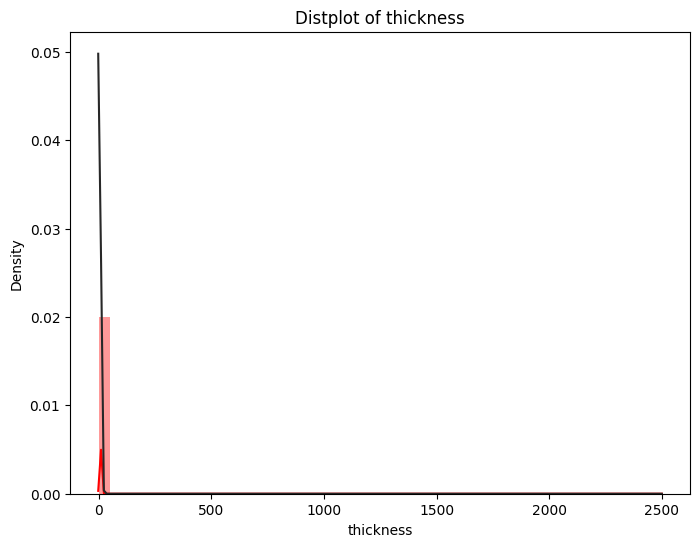

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


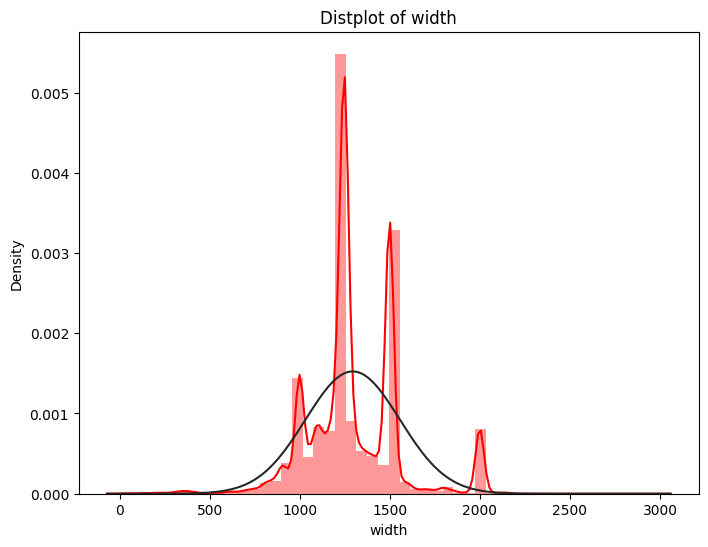

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


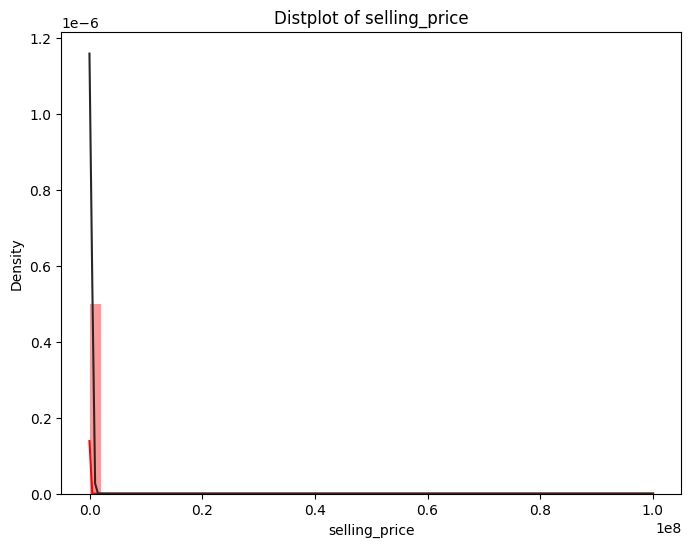

C:\Users\avmoh\AppData\Local\Temp\ipykernel_8632\2172992010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[i],fit=norm,color="red")


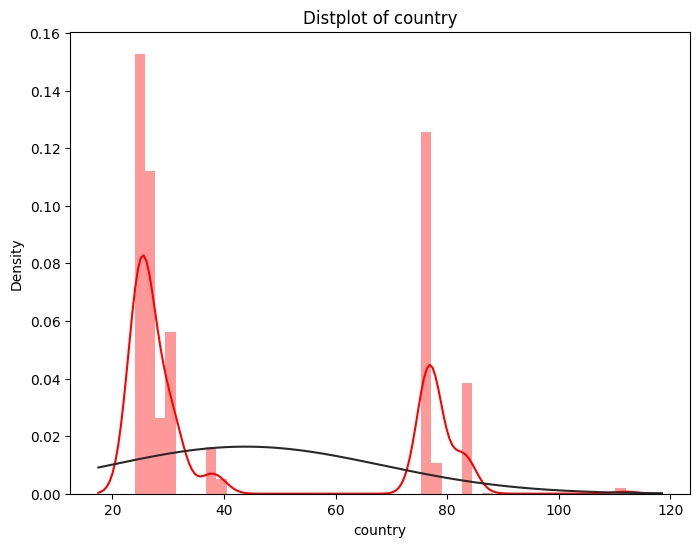

In [94]:
for i in columns1:    
    plt.figure(figsize=(8,6))  
    sns.distplot(df2[i],fit=norm,color="red")
    plt.title(f'Distplot of {i}')
    plt.show()

In [95]:
df.selling_price.skew()

301.3532474673474

In [96]:
df1.selling_price.skew()

-5.342799354887634

In [97]:
df2.selling_price.skew()

301.3490997174711

In [98]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,3.332205,Won,W,2.302585,0.693147,7.313220,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,3.218876,Won,W,3.713572,-0.223144,7.098376,104991,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,3.401197,Won,WI,3.332205,-0.967584,6.858565,S0380700,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,3.465736,Won,S,4.077537,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,3.332205,Won,W,2.302585,1.386294,7.600902,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,4.670802,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.122867,1000222,164141591,2020-07-01,6.400257
181668,2020-07-02,4.629691,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.106606,1000777,164141591,2020-07-01,6.381816
181669,2020-07-02,5.337954,30200854.0,3.218876,Won,W,3.713572,-0.051293,7.313220,1000227,164141591,2020-07-01,6.378426
181670,2020-07-02,1.443523,30200854.0,3.218876,Won,W,3.713572,-0.342490,7.130899,1004216,164141591,2020-07-01,6.428105


In [99]:
tra=tra = df1.select_dtypes(include='object').columns
tra

Index(['item_date', 'status', 'item type', 'material_ref', 'delivery date'], dtype='object')

In [100]:
from datetime import datetime
def convert_date(dateformat):
    x=datetime.strptime(str(dateformat),"%Y-%m-%d")
    return x.toordinal()

In [101]:
df1['item_date']=df1['item_date'].apply(lambda i:convert_date(i))
df1['delivery date']=df1['delivery date'].apply(lambda i:convert_date(i))


In [102]:
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,737881,3.991779,30156308.0,3.332205,Won,W,2.302585,0.693147,7.313220,DEQ1 S460MC,1670798778,737972,6.749931
1,737881,6.643822,30202938.0,3.218876,Won,W,3.713572,-0.223144,7.098376,104991,1668701718,737881,6.953684
2,737881,5.956169,30153963.0,3.401197,Won,WI,3.332205,-0.967584,6.858565,S0380700,628377,737791,6.468211
3,737881,5.310301,30349574.0,3.465736,Won,S,4.077537,0.832909,7.183112,DX51D+ZM310MAO 2.3X1317,1668701718,737791,6.643790
4,737881,6.666354,30211560.0,3.332205,Won,W,2.302585,1.386294,7.600902,2_S275JR+AR-CL1,640665,737850,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,737608,4.670802,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.122867,1000222,164141591,737607,6.400257
181668,737608,4.629691,30200854.0,3.218876,Won,W,3.713572,-0.040822,7.106606,1000777,164141591,737607,6.381816
181669,737608,5.337954,30200854.0,3.218876,Won,W,3.713572,-0.051293,7.313220,1000227,164141591,737607,6.378426
181670,737608,1.443523,30200854.0,3.218876,Won,W,3.713572,-0.342490,7.130899,1004216,164141591,737607,6.428105


In [103]:
tra1=tra = df1.select_dtypes(include='object').columns
tra1

Index(['status', 'item type', 'material_ref'], dtype='object')

In [104]:
df1.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [105]:
df1['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

REGRESSOR MODEL

In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
x=df1.drop(['selling_price','material_ref'],axis=1)
y=df1.selling_price

# One-Hot Encoding, encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item type']])
x_ohe = ohe.fit_transform(x[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(x[['status']])
x_ohe1 = ohe2.fit_transform(x[['status']]).toarray()

# independent features after encoding
x = np.concatenate((x[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, x_ohe, x_ohe1), axis=1)


# Normalizing the encoded data
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dt = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
gscv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
gscv.fit(x_train, y_train)
print("Best hyperparameters:", gscv.best_params_)
best_model = gscv.best_estimator_
y_pred = best_model.predict(x_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5}
Mean squared error: 0.039729474223371496
R-squared: 0.8766820341694849


c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1320 fits failed out of a total of 3960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

In [110]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('rohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)
    
with open('rohe2.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

CLASSIFICATION MODEL

In [111]:
df1 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df1)

150427

In [112]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

X= df1[['item type','application','width','country','customer','product_ref']]
Y = df1['status']


# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

lb = LabelBinarizer()
lb.fit(Y) 
Y = lb.fit_transform(Y)

# independent features after encoding
X = np.concatenate((X[['application','width','country','customer','product_ref']].values, X_ohe), axis=1)


# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [113]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix


# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


# evalution metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8804094927873429


In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7002
           1       0.91      0.94      0.92     23084

    accuracy                           0.88     30086
   macro avg       0.84      0.82      0.83     30086
weighted avg       0.88      0.88      0.88     30086



In [117]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as f:
    pickle.dump(dtc, f)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('cohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)